# Corn data example
Data is from https://www.genetics.org/content/suppl/2010/09/02/genetics.110.118521.DC1

Formatted by https://github.com/rileymcdowell/genomic-neuralnet


Species: Corn

Number of instances (different varieties): 264

Number of features (SNPs): 1134

Trait of interest: yield (continuous variable: weight/area)


In [2]:
# import warnings filter
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv("corn_data.csv")
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1126,1127,1128,1129,1130,1131,1132,1133,1134,output
0,0,1,-1,1,1,1,0,1,-1,1,...,-1,1,-1,1,1,-1,0,0,-1,2.516485
1,1,1,-1,1,1,-1,-1,1,-1,1,...,-1,1,-1,0,1,-1,-1,1,0,1.640909
2,2,0,1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,1,1,-1,-1,1,0,0.416348
3,3,1,1,1,0,-1,1,1,-1,1,...,-1,1,-1,-1,1,-1,-1,1,0,1.338558
4,4,1,1,1,0,-1,-1,1,0,1,...,-1,1,-1,0,-1,-1,1,1,0,1.729517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,1,1,0,1,-1,0,1,0,1,...,-1,1,-1,0,-1,-1,-1,1,0,1.646250
260,260,1,1,1,0,-1,-1,1,-1,-1,...,-1,0,-1,-1,-1,-1,-1,1,0,0.734435
261,261,-1,1,0,1,-1,-1,1,-1,1,...,-1,1,0,1,1,1,-1,1,1,2.749310
262,262,1,-1,-1,1,-1,-1,1,1,-1,...,-1,1,-1,-1,1,-1,-1,1,0,1.102444


In [4]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]
X,y

(     Unnamed: 0  0  1  2  3  4  5  6  7  8  ...  1125  1126  1127  1128  1129  \
 0             0  1 -1  1  1  1  0  1 -1  1  ...     1    -1     1    -1     1   
 1             1  1 -1  1  1 -1 -1  1 -1  1  ...    -1    -1     1    -1     0   
 2             2  0  1  1 -1 -1 -1  1 -1 -1  ...    -1    -1     1    -1     1   
 3             3  1  1  1  0 -1  1  1 -1  1  ...    -1    -1     1    -1    -1   
 4             4  1  1  1  0 -1 -1  1  0  1  ...     1    -1     1    -1     0   
 ..          ... .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   
 259         259  1  1  0  1 -1  0  1  0  1  ...     1    -1     1    -1     0   
 260         260  1  1  1  0 -1 -1  1 -1 -1  ...     1    -1     0    -1    -1   
 261         261 -1  1  0  1 -1 -1  1 -1  1  ...     1    -1     1     0     1   
 262         262  1 -1 -1  1 -1 -1  1  1 -1  ...     0    -1     1    -1    -1   
 263         263  1 -1  1  0 -1 -1  1 -1  1  ...     1    -1     1    -1    -1   
 
      1130  11

SNPs are encoded: 0 means heterozygous and 1/-1 mean homozygous.  e.g.:
* -1: AA
* 0: AT
* 1: TT


# Initial data visualization

<IPython.core.display.Javascript object>


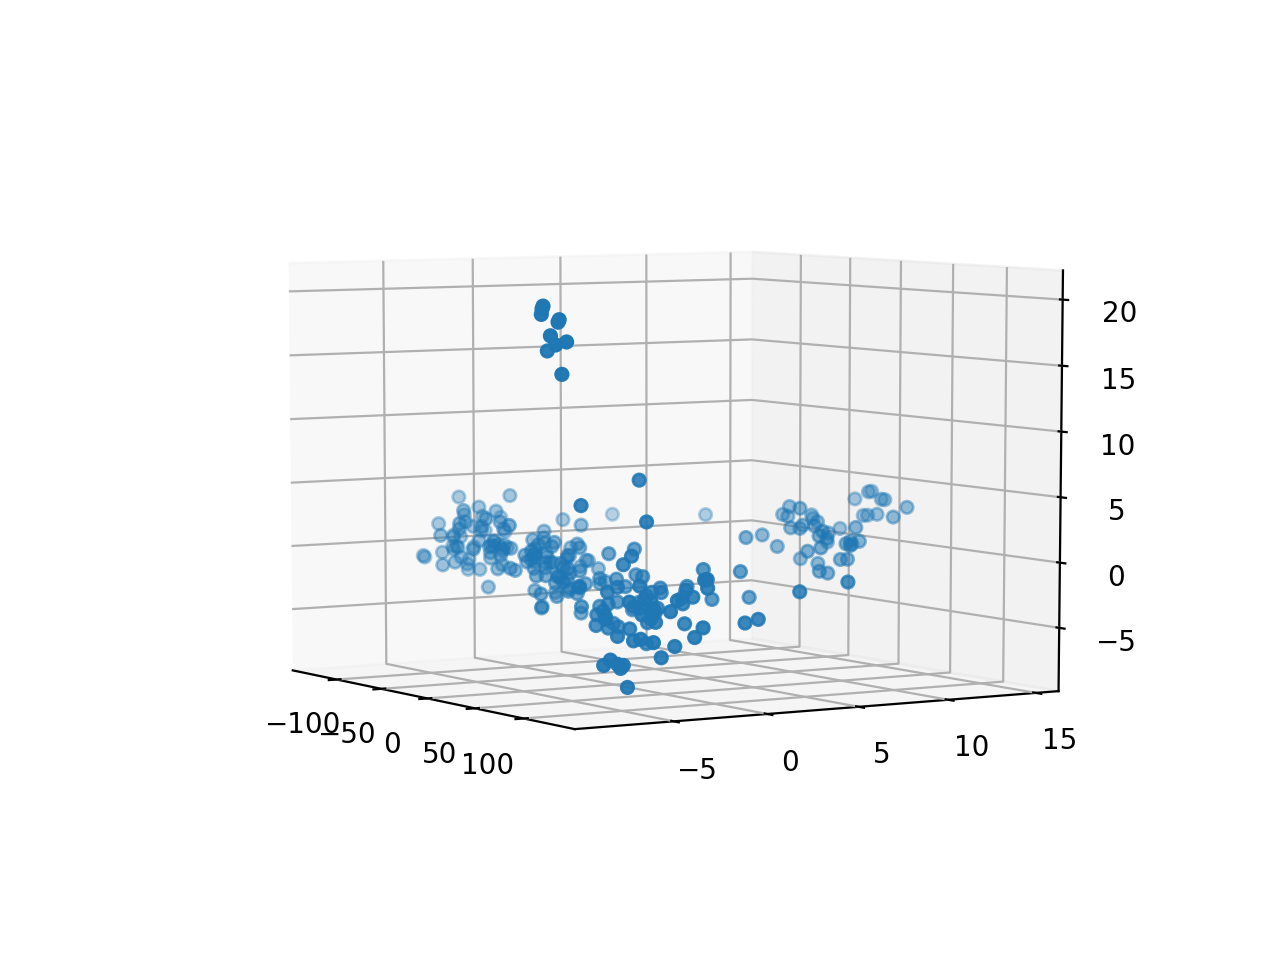

In [5]:
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook

from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d

fig = plt.figure()
ax= plt.axes(projection='3d')

pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:,2])
plt.show()

<IPython.core.display.Javascript object>


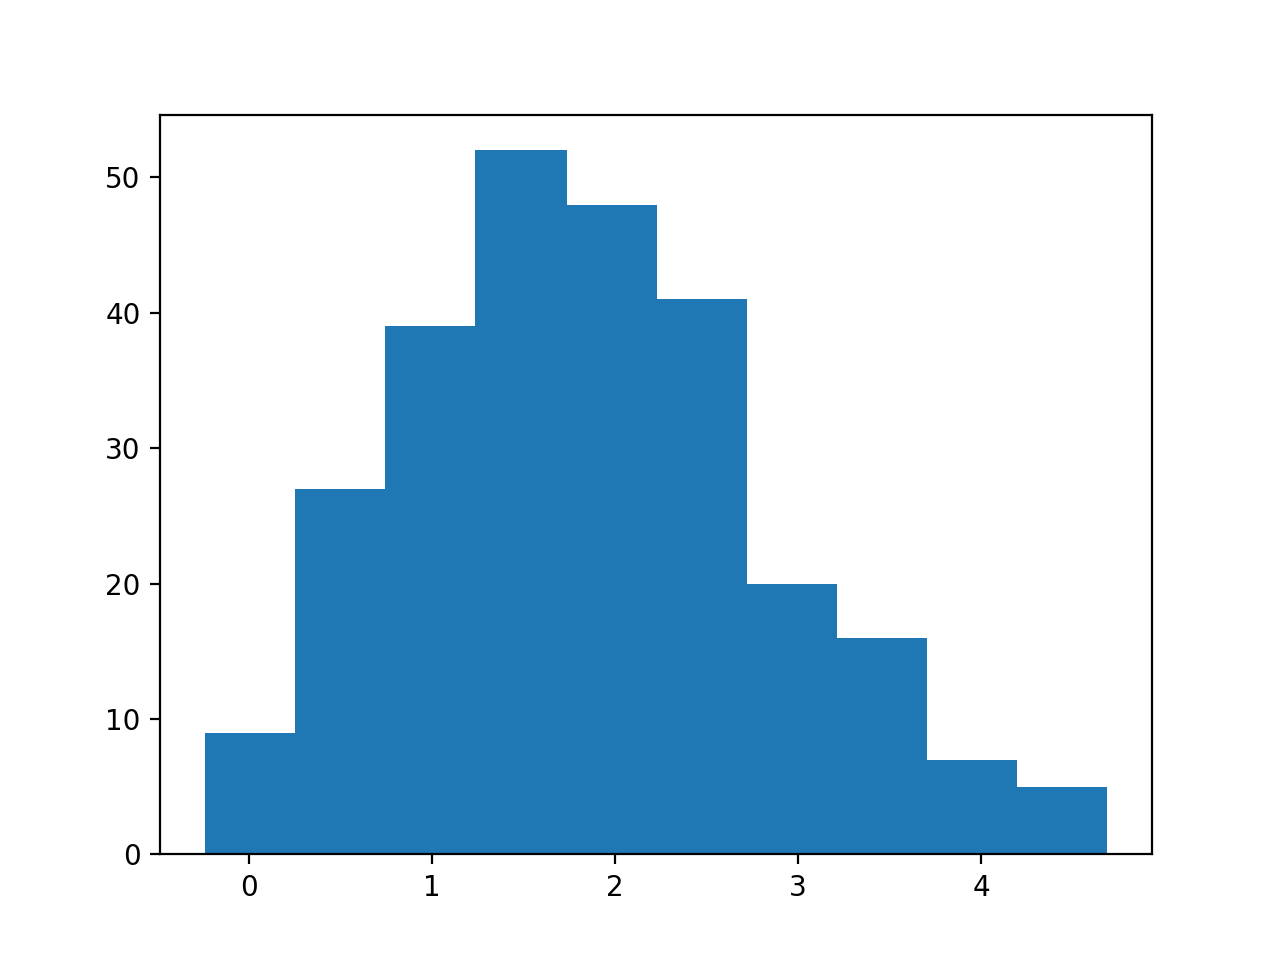

In [9]:
import numpy as np
hist, bin_edges = np.histogram(y)
fig = plt.figure()
plt.bar(bin_edges[:-1], hist, width=0.5)
plt.show()

In [11]:

from sklearn.model_selection import train_test_split

split = 0.2 # use 20% of the data for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split)


running this next cell takes around 2 minutes...

In [12]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

classifier = XGBRegressor(objective ='reg:squarederror')
grid = {
    'n_estimators': [10,50,100],
    'max_depth' : [4,5,7,10],
    'learning_rate' : [0.0001, 0.001, 0.01]
}

gd_sr = GridSearchCV(estimator=classifier,
                       param_grid=grid,
                       scoring='r2', # note the use of scoring here.
                       cv=5, iid=False)


gd_sr.fit(X_train, y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)
 


{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}


In [13]:
best_clf = XGBRegressor(objective='reg:squarederror',
                        n_estimators=best_parameters['n_estimators'], 
                        max_depth=best_parameters['max_depth'], 
                        learning_rage=best_parameters['learning_rate'])

# has best set of parameters, now retrain on all training data.

best_clf.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rage=0.01, learning_rate=0.1,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
             n_estimators=100, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [14]:
y_pred = best_clf.predict(X_test)
y_pred_tr = best_clf.predict(X_train)

# How did we do?

plot actual values vs predcited for training set.

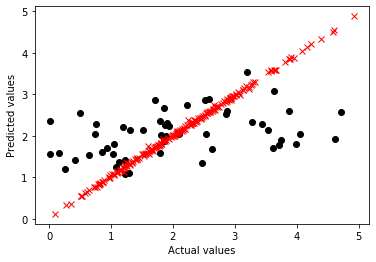

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.plot(y_test, y_pred, 'o', color='black')
plt.plot(y_train,y_pred_tr, 'x', color='red')
plt.show()



In [16]:
from sklearn.metrics import r2_score
# we use r2 because we are doing regression, not classification
print('Training set:',r2_score(y_train,y_pred_tr))
print('Test set:',r2_score(y_test,y_pred))

Training set: 0.9985312223595368
Test set: 0.1509965132169161


# Use SVM, Feature Selection and Feature Extraction

First, take some data to do feature selection

Remember X_train, y_train are our data sets

In [17]:

from sklearn.feature_selection import SelectKBest, f_regression

# do train-test split to get sample to do feature selection

split= 0.20 # use 20% for feature selection
X_train_FS, X_FS, y_train_FS, y_FS = train_test_split(X_train, y_train, test_size=split)

print('before selecting:', X_train_FS.shape)
skb = SelectKBest(f_regression, k=500)
skb.fit(X_FS,y_FS)
X_train_FS = skb.transform(X_train_FS)
print('after selecting:', X_train_FS.shape)


before selecting: (168, 1136)
after selecting: (168, 500)


C:\Users\alfal\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\alfal\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\alfal\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\alfal\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\alfal\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\alfal\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value 

This next cell takes around 2 minutes. 
This is even though we have reduced the number of features to 500.

In [18]:
from sklearn.svm import SVR

classifier = SVR(kernel='linear') 

grid = {
    'C' : [10**i for i in range(-10,10,1)] 
   }

gd_sr = GridSearchCV(estimator=classifier,
                       param_grid=grid,
                       scoring='r2', # note the use of scoring here.
                       cv=5, iid=False)


gd_sr.fit(X_train_FS, y_train_FS)

best_parameters = gd_sr.best_params_
print(best_parameters)
 


{'C': 0.001}


In [19]:
best_clf = SVR(kernel='linear',C=best_parameters['C'])
best_clf.fit(X_train,y_train)


SVR(C=0.001, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
y_pred = best_clf.predict(X_test)
y_pred_tr = best_clf.predict(X_train)

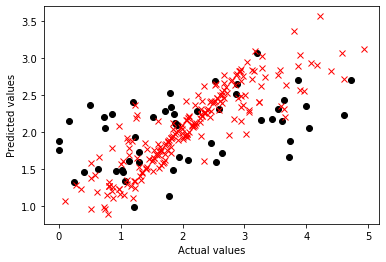

In [21]:
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.plot(y_test, y_pred, 'o', color='black')
plt.plot(y_train,y_pred_tr, 'x', color='red')

plt.show()


In [22]:
print('Training set:',r2_score(y_train,y_pred_tr))
print('Test set:',r2_score(y_test,y_pred))

Training set: 0.6887640193904323
Test set: 0.20412561886958747


In [23]:
from sklearn.feature_selection import RFE
sel = RFE(best_clf,20,5)

In [24]:
sel = sel.fit(X_test, y_test)

In [25]:
print(np.argwhere(sel.ranking_ == 1).ravel()) # this code finds the feature numbers that are ranked first

[  29  129  132  164  245  262  404  514  524  548  720  724  772  818
  944  948  954 1008 1075 1079]


# can we do better with RBF kernel?

In [26]:
classifier = SVR(kernel='rbf') 

grid = {
    'C' : [10**i for i in range(-10,10,2)] ,
    'gamma' : [2**i for i in range(-10,10,2)]
   }

gd_sr = GridSearchCV(estimator=classifier,
                       param_grid=grid,
                       scoring='r2', # note the use of scoring here.
                       cv=5, iid=False)


gd_sr.fit(X_train_FS, y_train_FS)

best_parameters = gd_sr.best_params_
print(best_parameters)
 


{'C': 100, 'gamma': 0.00390625}


In [27]:
best_clf = SVR(kernel='rbf',C=best_parameters['C'])
best_clf.fit(X_train,y_train)


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

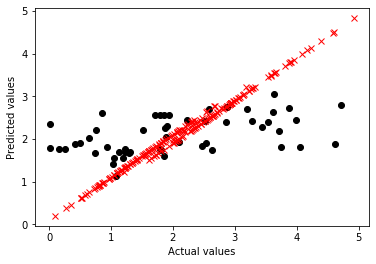

In [28]:
y_pred = best_clf.predict(X_test)
y_pred_tr = best_clf.predict(X_train)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.plot(y_test, y_pred, 'o', color='black')
plt.plot(y_train,y_pred_tr, 'x', color='red')

plt.show()


In [29]:
print('Training set:',r2_score(y_train,y_pred_tr))
print('Test set:',r2_score(y_test,y_pred))

Training set: 0.9891805359744785
Test set: 0.2107864625491188


We can't easily do feature ranking with an RBF kernel.